# COL744 : Machine Learning (Assignment 1)

## Question 2

### Part (a) : Smapling 1 million datapoints
In this part I have sampled $10^6$ datapoints with 2 features $X_1$ and $X_2$ and then found $y^{(i)}$ by adding error $\epsilon_i$ to $\theta^Tx^{(i)}$ with $\theta$ = [3,1,2]. Here all the variables come from the following distribution.

* $y = \Sigma_{i=1}^{m} {\theta _i x_{i}} + \epsilon_{i}$

* $x1 \sim{} \mathcal{N} (3,4)$ 

* $x2 \sim{} \mathcal{N} (-1,4)$

* $\epsilon_i \sim{} \mathcal{N} (0,2)$

In [1]:
%matplotlib notebook
from tqdm import tqdm
import numpy as np
import pandas as pd
import pickle
import os
import math

import matplotlib as mp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.animation import FuncAnimation


In [2]:
theta = np.array([3,1,2])
sampleSize=10**6

In [3]:
if os.path.isfile('./data/xQ2.pkl') and os.path.isfile('./data/yQ2.pkl'):
    with open('./data/xQ2.pkl', 'rb') as f:
        X = pickle.load(f)
    with open('./data/yQ2.pkl', 'rb') as f:
        Y = pickle.load(f)
elif not os.path.isfile('xQ2.pkl'):
    dataX1 = [np.random.normal(loc=3, scale=2) for i in range(sampleSize)]
    dataX2 = [np.random.normal(loc=-1, scale=2) for i in range(sampleSize)]
    error = [np.random.normal(loc=0, scale=math.sqrt(2)) for i in range(sampleSize)]

    X_ = np.vstack((dataX1,dataX2)) # X_.shape = (2,smpaleSize)
    X = np.vstack((np.ones(X_.shape[1]), X_)).T # X.shape = (sampleSize,3)
    Y = (X.dot(theta)) - error
    
    if not os.path.isdir('./data'):
        os.mkdir('./data')
    
    with open('./data/xQ2.pkl', 'wb') as f:
        pickle.dump(X,f)
    with open('./data/yQ2.pkl', 'wb') as f:
        pickle.dump(Y,f)    

## (b) Implementing SGD

* In this part I have implemented SGD with $\eta$ = 0.001 and tested it with differnt batch size of (1,100,10000,1000000).

* To check the convergence I have taken average of $J(\theta)$ after every 1000 iterations and if their difference is less than 1e-4 then I have stopped the algorithm. Also I have passed a parameter max_iter = $10^6$ to stop the algorithm after that many iterations.

In [4]:
def grad(theta, X, Y):
    '''Function to compute partial differentiation wrt theta'''
    err = (X.dot(theta)) - Y #100x1
    loss_val = ((err**2).sum())/(2*X.shape[0])
    grad_val = (1/X.shape[0])*((X.T).dot(err))
    return (grad_val, loss_val)

def SGD(X,Y,lr=0.001,r=1, max_iter=10**6, tolerance=1e-4):
    indices = np.random.permutation(X.shape[0])
    X = X.take(indices, axis=0)
    Y = Y.take(indices, axis=0)
    batchNo = 0
    epoch = 0
    currentSum = 0
    previousAvg = np.inf
    
    theta = np.zeros(X.shape[1])
    totalBatchForOneEpoch = X.shape[0]/r
    
    loss_lst = []
    theta_lst=[]
    
    for i in tqdm(range(max_iter)):
        if batchNo == totalBatchForOneEpoch:
            batchNo=0
            epoch+=1
        if i%1000 == 0:
            if abs((currentSum/1000)-previousAvg) <= tolerance:
                print('converged in %d iterations'%(i))
                break
            else:
                previousAvg = currentSum/1000
                currentSum = 0
        X_curr = X[(batchNo*r):((batchNo+1)*r),:]
        Y_curr = Y[(batchNo*r):((batchNo+1)*r)]
        (grad_val, loss_val) = grad(theta, X_curr, Y_curr)
        currentSum += loss_val
        theta_next= theta - lr * np.array(grad_val)
        theta_lst.append(theta)
        loss_lst.append(loss_val)
        theta=theta_next
        batchNo+=1
    
    return (theta_lst, loss_lst)

In [5]:
(theta_lst1, loss_lst1) = SGD(X,Y,r=1)

 54%|█████████████████████████████████████▋                                | 538335/1000000 [00:08<00:07, 61841.51it/s]

converged in 543000 iterations


 54%|█████████████████████████████████████▋                                | 538335/1000000 [00:08<00:07, 62138.13it/s]


In [6]:
(theta_lst100, loss_lst100) = SGD(X,Y,r=100)

100%|█████████████████████████████████████████████████████████████████████| 1000000/1000000 [00:17<00:00, 57024.11it/s]


In [7]:
(theta_lst10000, loss_lst10000) = SGD(X,Y,r=10000)

  2%|█▎                                                                      | 17669/1000000 [00:02<02:33, 6405.87it/s]

converged in 18000 iterations


  2%|█▎                                                                      | 17669/1000000 [00:02<02:36, 6268.92it/s]


In [8]:
(theta_lst1000000, loss_lst1000000) = SGD(X,Y,r=10**6)

  2%|█▎                                                                      | 17999/1000000 [05:56<5:07:24, 53.24it/s]

converged in 18000 iterations


  2%|█▎                                                                      | 17999/1000000 [06:10<5:07:24, 53.24it/s]

In [9]:
print('for r=1 --> Theta = {}'.format(theta_lst1[-1]))
print('for r=100 --> Theta = {}'.format(theta_lst100[-1]))
print('for r=10000 --> Theta = {}'.format(theta_lst10000[-1]))
print('for r=1000000 --> Theta = {}'.format(theta_lst1000000[-1]))

for r=1 --> Theta = [2.97919524 1.01608836 2.04332131]
for r=100 --> Theta = [3.00054451 1.00314857 1.99742115]
for r=10000 --> Theta = [2.97844104 1.00384113 1.99781854]
for r=1000000 --> Theta = [2.97843004 1.00397486 1.99797575]


### Part (c) : Observing various thetas and finding their error on test dataset

* The thetas that we got for different batch size are given in the table below with some other useful information.

| Batch Size (r) | $\theta$         | Number of iterations | Iterations/sec$^*$ | Time(Sec)$^*$ | Error on Test Dataset |
|----------------|------------------|----------------------|--------------------|---------------|-----------------------|
| 1              | [2.97 1.01 2.04] | 5,43,000             | 61,841             | 8             | 1.4727                |
| 100          | [3.00 1.00 1.99] | 10,00,000            | 57,024             | 17            | 1.4028                |
| 10000          | [2.97 1.00 1.99] | 18,000               | 6,268              | 2             | 1.4030                |
| 1000000            | [2.97 1.00 1.99] | 18,000               | 53                 | 370           | 1.4030                |
$^*$ - (Reported by tqdm)||||**Error for $\theta$=[3,1,2]**|1.4021

* As we can see that all these theta values are close to [3,1,2] which we used to sampled to dataset.

* Number of iterations for r=1 is less than r=100. And for r=10000 and 1000000 number of iterations are fairly small as they are finding gradient over more number of examples in a given iteration.

* Iterations per second are significanlty reduces as r increases from 1 to 1000000.

* Overall time also increases as r goes from 1 to 1000000.

* Error on test dataset is also very close to the error if we get theta=[3,1,2] as theta we got in every case is much closer to [3,1,2].

In [10]:
theta1 = theta_lst1[-1]
theta100 = theta_lst100[-1]
theta10000 = theta_lst10000[-1]
theta1000000 = theta_lst1000000[-1]

In [13]:
Data = pd.read_csv('./ass1_data/data/q2/q2test.csv').to_numpy()

X = Data[:,:2]
Y = Data[:,2]

def findError(X,Y,theta):
    pred = X.dot(theta[1:3]) + theta[0]
    error = Y - pred
    rmse = np.sqrt((error**2).sum()/(X.shape[0]))
    return rmse
print('Error on test data with (r=1) : %s'%(findError(X[:,:2],Y,theta1)))
print('Error on test data with (r=100) : %s'%(findError(X[:,:2],Y,theta100)))
print('Error on test data with (r=10000) : %s'%(findError(X[:,:2],Y,theta10000)))
print('Error on test data with (r=1000000) : %s'%(findError(X[:,:2],Y,theta1000000)))
print('Error on test data using theta = [3,1,2] : %s'%(findError(X[:,:2],Y,np.array([3,1,2]))))


Error on test data with (r=1) : 1.4727354805367239
Error on test data with (r=100) : 1.4028271975941902
Error on test data with (r=10000) : 1.403018409600393
Error on test data with (r=1000000) : 1.4030107997954164
Error on test data using theta = [3,1,2] : 1.4021033638787122


### Part (d) : Plotting movement of $\theta$ in 3d space

In this part I have plotted movement of theta in 3d space for all 4 sizes.

In [14]:
def plotTheta3D(theta_lst):
    fig = plt.figure(figsize=(8,6))
    ax = fig.gca(projection='3d')

    ax.set_xlabel('$\\theta_0$', color='r')
    ax.set_ylabel('$\\theta_1$', color='r')
    ax.set_zlabel('$\\theta_2$', color='r')
    ax.set_zlim(0,2.5)
    ax.set_xlim(0, 3.5)
    ax.set_ylim(0, 1.5)
    graph, = plt.plot([], [], 'x',markersize=1, c='black', label = '$<\\theta_0, \\theta_1, \\theta_2>$')
    def animate(i):
        graph.set_data(data[:i+1,0], data[:i+1,1])
        graph.set_3d_properties(data[:i+1,2])
        return graph

    data = np.array(theta_lst)
    anim = FuncAnimation(fig, animate, interval=1)
    plt.legend(loc=4)
    plt.title('3Dplot representing movement of theta ')
    plt.show()
    return anim

* Plot Representing movement of $\theta$ in 3d space for batch size=1 

<IPython.core.display.Javascript object>


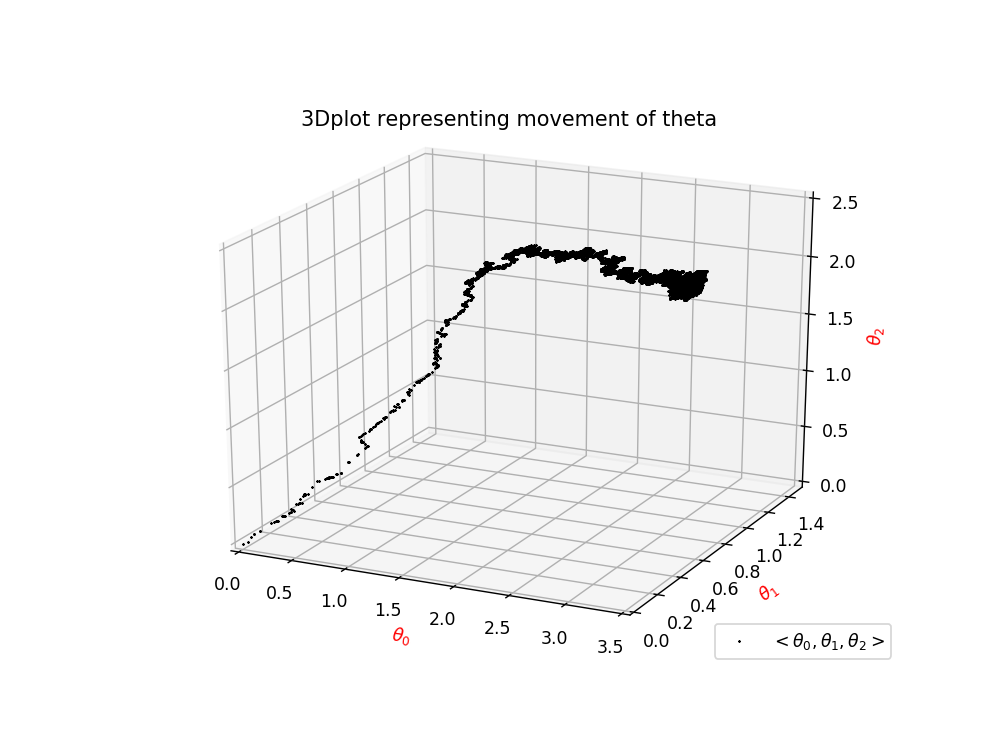

In [23]:
plotTheta3D(theta_lst1)

* Plot Representing movement of $\theta$ in 3d space for batch size=100

<IPython.core.display.Javascript object>


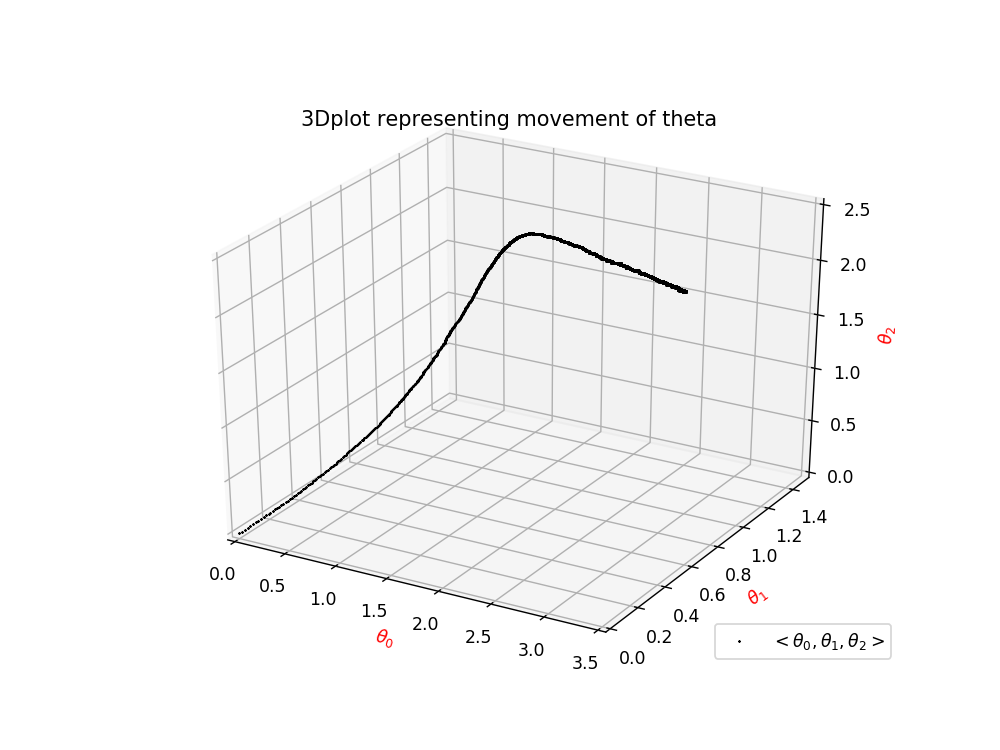

In [31]:
plotTheta3D(theta_lst100)

* Plot Representing movement of $\theta$ in 3d space for batch size=10000

<IPython.core.display.Javascript object>


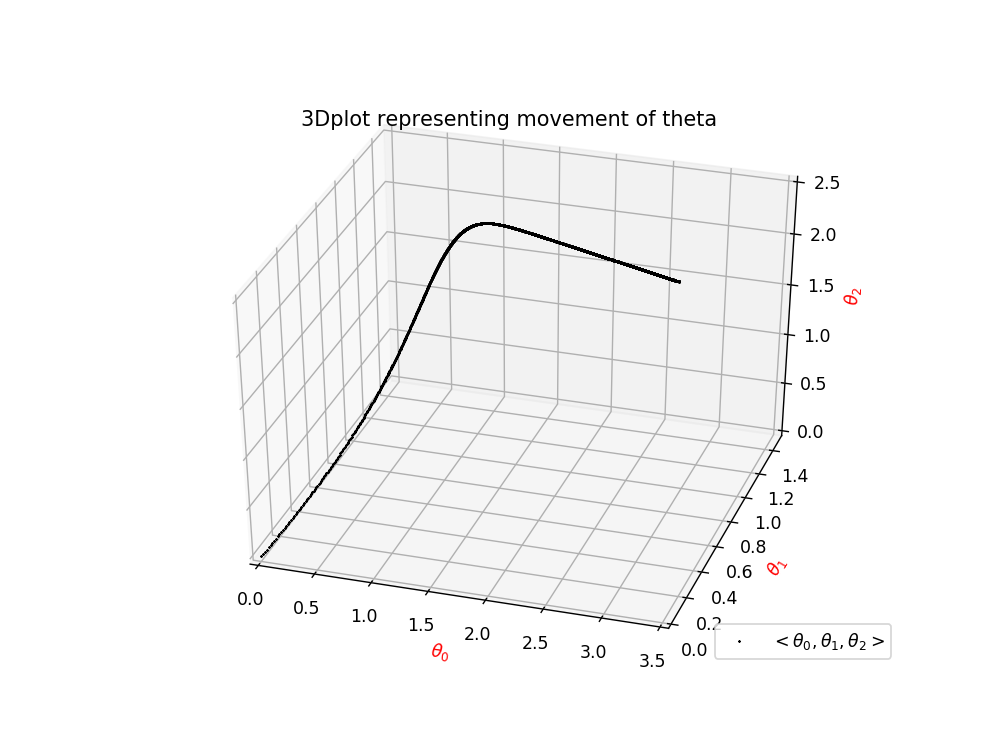

In [21]:
plotTheta3D(theta_lst10000)

* Plot Representing movement of $\theta$ in 3d space for batch size=1000000

<IPython.core.display.Javascript object>


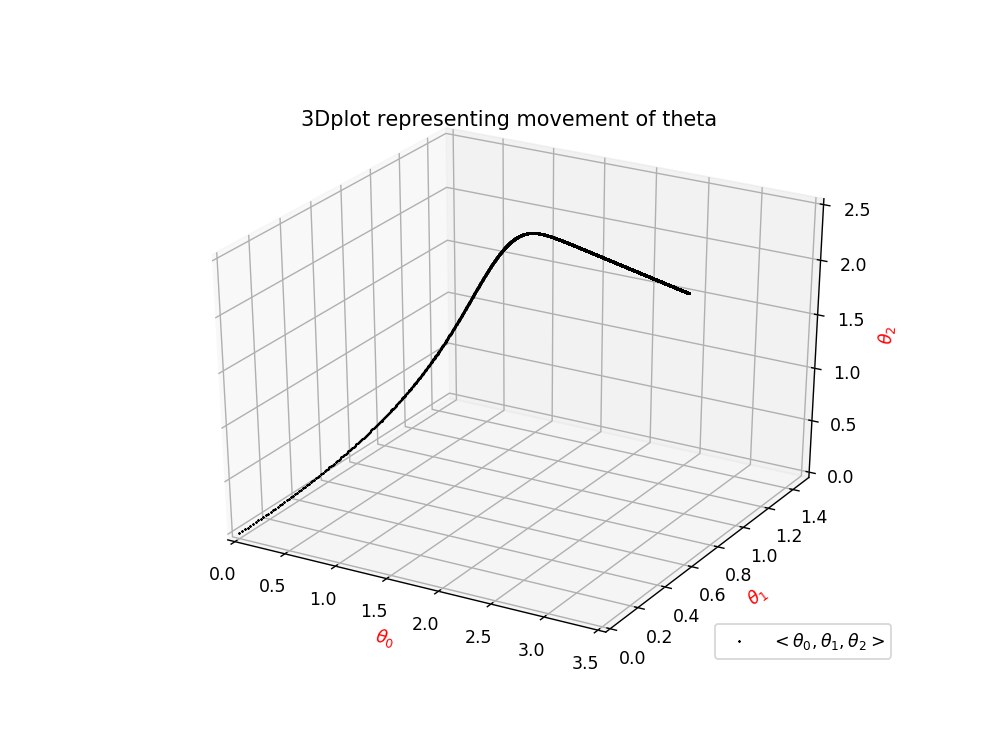

In [24]:
plotTheta3D(theta_lst1000000)

#### Observations:

In this plots we can see that theta for batch size = 1 moves with lots of jitter in space, and as batch size increases theta moves smoothly in the space. Which is as expected as lower batch size will update theta after seeing fewer datapoints.